![rmotr](https://user-images.githubusercontent.com/7065401/52071918-bda15380-2562-11e9-828c-7f95297e4a82.png)
<hr style="margin-bottom: 40px;">

<img src="https://user-images.githubusercontent.com/7065401/39117173-a433bf6a-46e6-11e8-8a40-b4d4d6422493.jpg"
    style="width:200px; float: right; margin: 0 40px 40px 40px;"></img>

# Dealing with missing data in Pandas

Having missing values in a dataset can cause errors with some machine learning algorithms.

There are several methods used for treating missing data in literature, textbooks and standard courses.

In this lecture we'll cover how to make <b>deletions and imputations</b> in our data to get rid of missing values. But is good to know that always will be drawbacks associated with each of these methods, so we'll need to be careful when using them to avoid bias or the under- or over-estimation of variability in our data. There is no way to deal with missing data without any impact.

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Hands on!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

%matplotlib inline

We'll load the census data from previous lectures and analyze if it has any missing data:

In [2]:
df = pd.read_csv('data/adult-small.csv')

df.head()

,unique_id,age,workclass,education,marital-status,occupation,sex,hours-per-week,native-country
0,10001,50,NaN,Bachelors,Married-civ-spouse,Exec-managerial,M,NO,United-States
1,10002,38,Private,HS-grad,NaN,Handlers-cleaners,8,40,United-States
2,10003,NaN,Private,?,NaN,Handlers-cleaners,8,40,Africa
3,10004,53,Private,11th,Married-civ-spouse,Handlers-cleaners,NaN,9356,United-States
4,10005,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,F,40,Cuba


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Identifying missing data

Dataframes are, after all, a collection of Series, so we can use the same methods we've seen so far:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 9 columns):
unique_id         86 non-null int64
age               85 non-null object
workclass         82 non-null object
education         83 non-null object
marital-status    80 non-null object
occupation        82 non-null object
sex               84 non-null object
hours-per-week    85 non-null object
native-country    80 non-null object
dtypes: int64(1), object(8)
memory usage: 6.1+ KB


In [4]:
df.isna().sum()

unique_id         0
age               1
workclass         4
education         3
marital-status    6
occupation        4
sex               2
hours-per-week    1
native-country    6
dtype: int64

In [5]:
df.isna().mean().round(4) * 100

unique_id         0.00
age               1.16
workclass         4.65
education         3.49
marital-status    6.98
occupation        4.65
sex               2.33
hours-per-week    1.16
native-country    6.98
dtype: float64

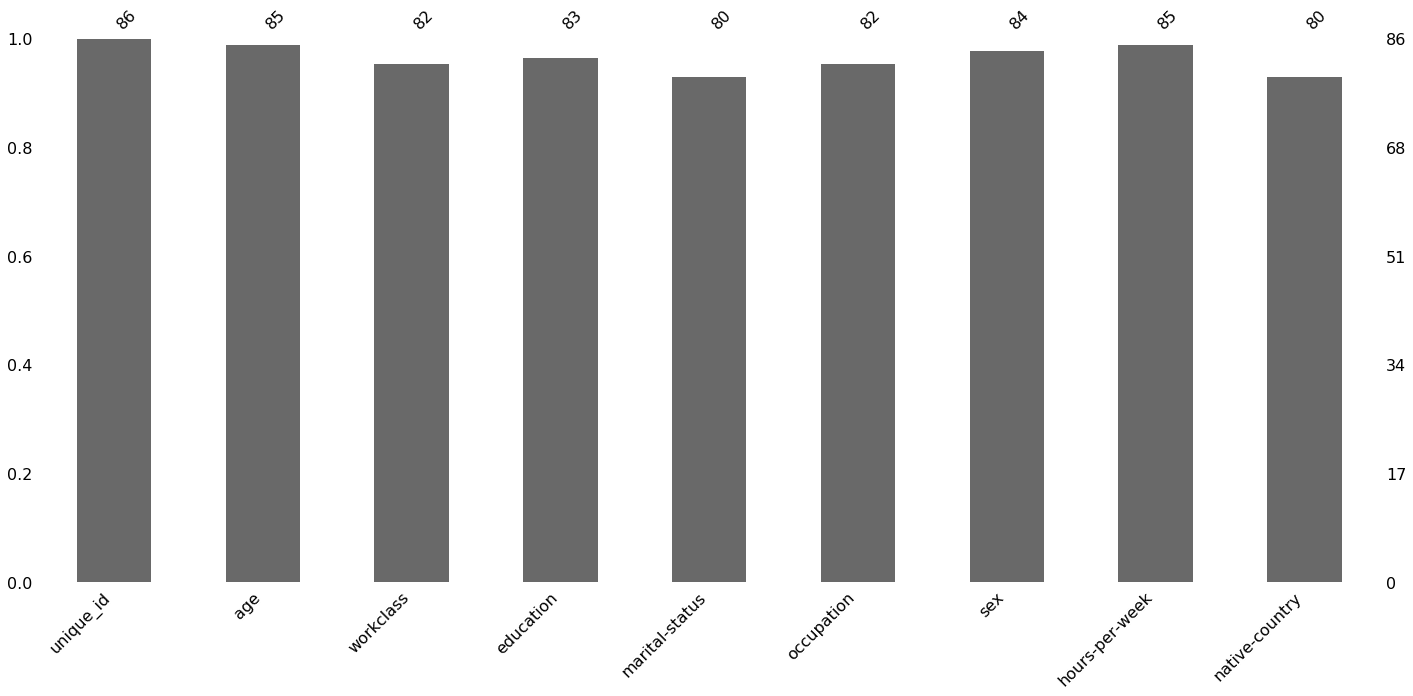

In [6]:
msno.bar(df)

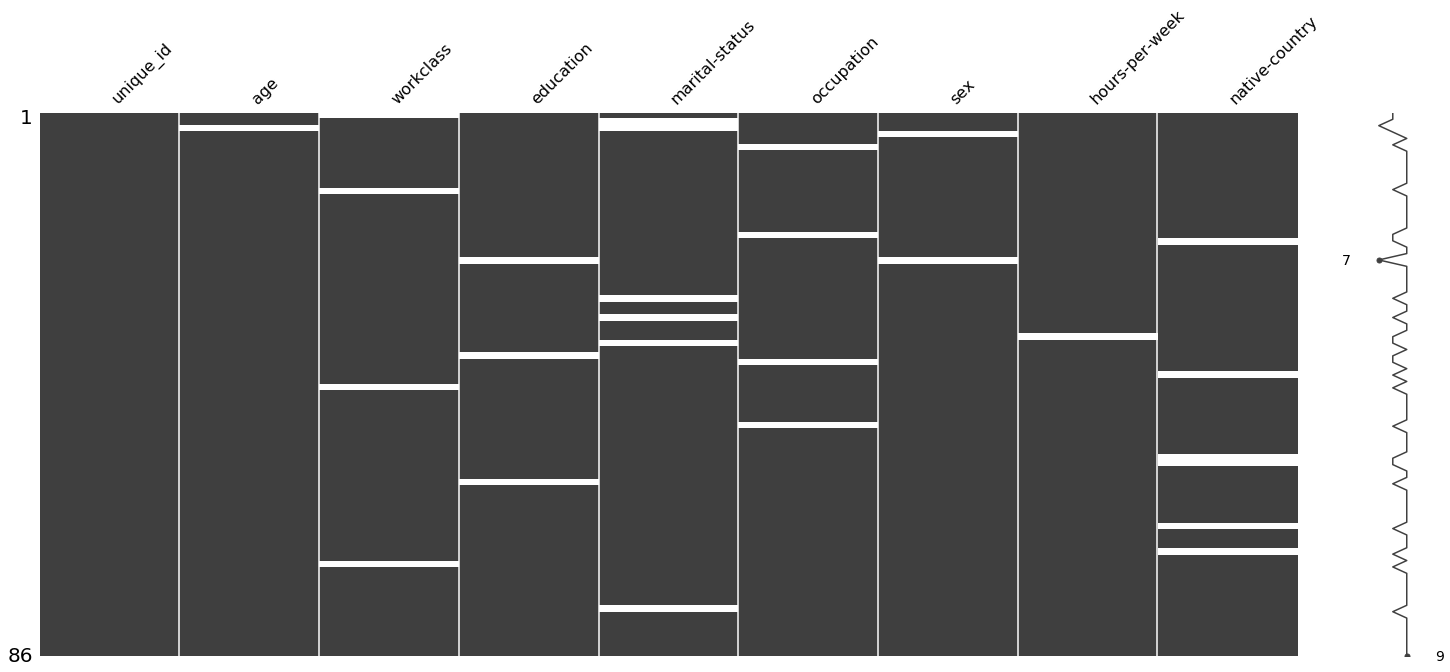

In [7]:
msno.matrix(df)

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Different types of missing data

While we talk about missing data is importart to know exactly why data goes missing.

- <b>Missing at Random (MAR)</b>: if the propensity for a data point to be missing is not related to the missing data, but it is related to some of the observed data.
- <b>Missing Completely at Random (MCAR)</b>: if the missing of a certain value has nothing to do with the values of other variables.
- <b>Missing not at Random (MNAR)</b>: if the missing value is dependent on some other variable’s value.

In the first two cases, it is safe to remove the data with missing values depending upon their occurrences, while in the third case removing observations with missing values can produce a bias in the model. So we have to be really careful before removing observations. Note that imputation does not necessarily give better results.

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Strategies for missing data

We'll learn the following strategies to handle missing data:

<img src="https://user-images.githubusercontent.com/7065401/57802879-5bddb180-772d-11e9-9f6d-f1db7d267717.jpg" />

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Filtering missing values

As we saw with numpy, we could combine boolean selection + `isna` or `isnull` to filter out those `NaN`s and null values:

In [8]:
df['native-country'].isna().sum()

6

In [9]:
df.loc[df['native-country'].isna(), :]

,unique_id,age,workclass,education,marital-status,occupation,sex,hours-per-week,native-country
20,10018,32,Private,HS-grad,Never-married,Machine-op-inspct,M,40,NaN
41,10039,31,Private,Some-college,Married-civ-spouse,Sales,M,38,NaN
54,10052,18,Private,HS-grad,Never-married,Other-service,F,30,NaN
55,10052,18,Private,HS-grad,Never-married,0,F,30,NaN
65,10062,32,?,7th-8th,Married-spouse-absent,?,O,0,NaN
69,10066,36,Private,HS-grad,Married-civ-spouse,Craft-repair,M,40,NaN


In [10]:
df.loc[df['native-country'].isnull(), :]

,unique_id,age,workclass,education,marital-status,occupation,sex,hours-per-week,native-country
20,10018,32,Private,HS-grad,Never-married,Machine-op-inspct,M,40,NaN
41,10039,31,Private,Some-college,Married-civ-spouse,Sales,M,38,NaN
54,10052,18,Private,HS-grad,Never-married,Other-service,F,30,NaN
55,10052,18,Private,HS-grad,Never-married,0,F,30,NaN
65,10062,32,?,7th-8th,Married-spouse-absent,?,O,0,NaN
69,10066,36,Private,HS-grad,Married-civ-spouse,Craft-repair,M,40,NaN


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Strategy 1: Deletion

The simplest strategy for handling missing data is to remove that missing values. But, as we said before, removing too many rows/columns with missing values can be too limiting on some predictive modeling problems.

We can use the `dropna` pandas method to get rid of `NaN`s values, but there will be a few things to consider, because we can't drop single values. We can only drop entire columns or rows.

In [11]:
df.head()

,unique_id,age,workclass,education,marital-status,occupation,sex,hours-per-week,native-country
0,10001,50,NaN,Bachelors,Married-civ-spouse,Exec-managerial,M,NO,United-States
1,10002,38,Private,HS-grad,NaN,Handlers-cleaners,8,40,United-States
2,10003,NaN,Private,?,NaN,Handlers-cleaners,8,40,Africa
3,10004,53,Private,11th,Married-civ-spouse,Handlers-cleaners,NaN,9356,United-States
4,10005,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,F,40,Cuba


### Deleting rows (listwise deletion)

This type of deletion is ok if the missing data is limited to a small number of observations. However removing a lot of missing rows and assuming data is MCAR (Missing Completely at Random) could produce biased parameters and estimates.

To perform this deletion of rows containing missing values we can just make a boolean selection + `notna()`, but it seems a little bit verbose and repetitive. And as we said before: any repetitive task will probably have a better, more DRY way. So we'll use the `dropna` pandas method.

The default `dropna` behavior will drop all the rows in which _any_ null value is present:

In [12]:
# df.loc[df['native-country'].notna()]

In [13]:
df.shape

(86, 9)

In [14]:
df2 = df.dropna()

In [15]:
df2.head()

,unique_id,age,workclass,education,marital-status,occupation,sex,hours-per-week,native-country
4,10005,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,F,40,Cuba
6,10007,49,Private,9th,Married-spouse-absent,Other-service,F,16,Jamaica
7,10007,49,Private,9th,Married-spouse-absent,Other-service,F,16,Jamaica
8,10008,52,Self-emp-not-inc,HS-grad,Married-civ-spouse,Exec-managerial,M,45,United-States
9,10009,31,Private,Masters,Never-married,Prof-specialty,F,50,United-States


In [16]:
df2.shape

(61, 9)

In [17]:
df2.isna().mean() * 100

unique_id         0.0
age               0.0
workclass         0.0
education         0.0
marital-status    0.0
occupation        0.0
sex               0.0
hours-per-week    0.0
native-country    0.0
dtype: float64

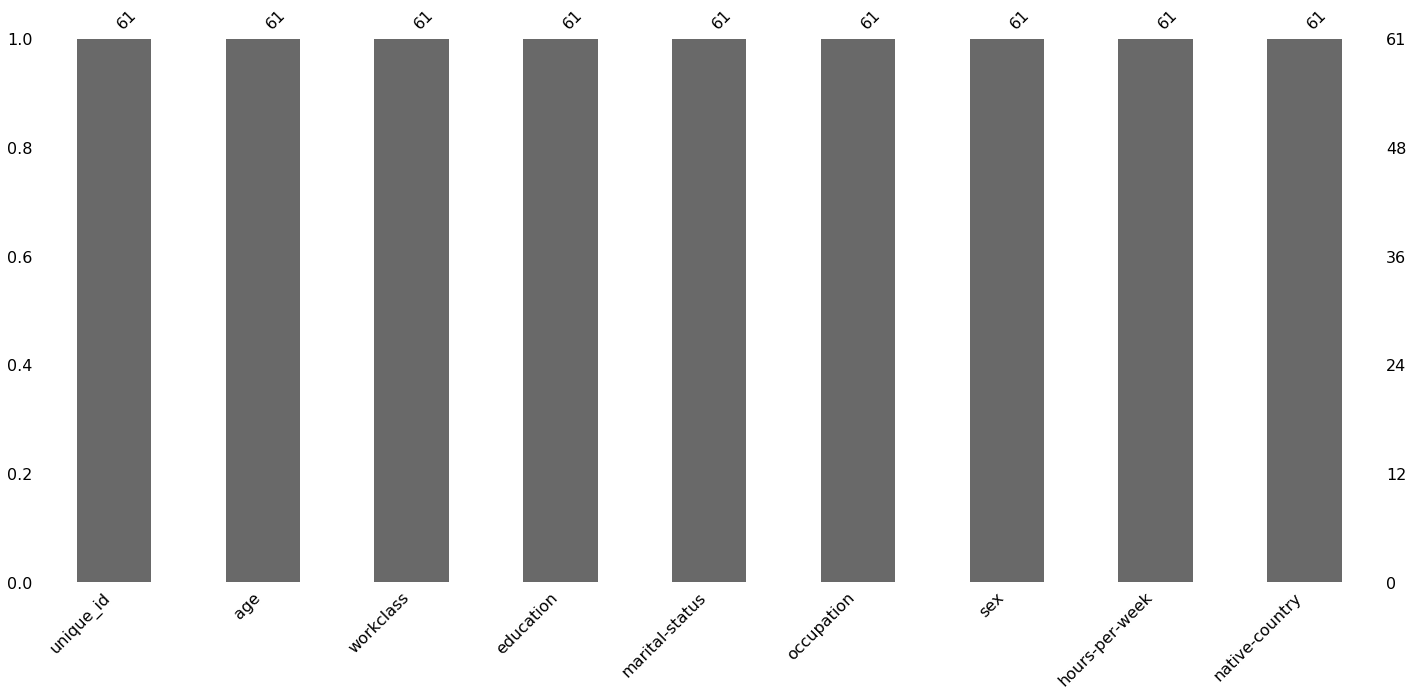

In [18]:
msno.bar(df2)

This `dropna` default behaviour, dropping any row that contains **at least** one null value, can be, depending on the case, too extreme.

We can control this behavior with the `how` parameter. Can be either `'any'` or `'all'`:

In [19]:
df.dropna(how='any').head() # default behavior, delete if 'any' NaN value is found

,unique_id,age,workclass,education,marital-status,occupation,sex,hours-per-week,native-country
4,10005,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,F,40,Cuba
6,10007,49,Private,9th,Married-spouse-absent,Other-service,F,16,Jamaica
7,10007,49,Private,9th,Married-spouse-absent,Other-service,F,16,Jamaica
8,10008,52,Self-emp-not-inc,HS-grad,Married-civ-spouse,Exec-managerial,M,45,United-States
9,10009,31,Private,Masters,Never-married,Prof-specialty,F,50,United-States


In [20]:
df.dropna(how='all').head() #delete just if 'all' values are NaN

,unique_id,age,workclass,education,marital-status,occupation,sex,hours-per-week,native-country
0,10001,50,NaN,Bachelors,Married-civ-spouse,Exec-managerial,M,NO,United-States
1,10002,38,Private,HS-grad,NaN,Handlers-cleaners,8,40,United-States
2,10003,NaN,Private,?,NaN,Handlers-cleaners,8,40,Africa
3,10004,53,Private,11th,Married-civ-spouse,Handlers-cleaners,NaN,9356,United-States
4,10005,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,F,40,Cuba


We can also use the `thresh` parameter to indicate a _threshold_ (a minimum number) of non-null values for the row to be kept. Default value is `None`.

In [21]:
df.head()

,unique_id,age,workclass,education,marital-status,occupation,sex,hours-per-week,native-country
0,10001,50,NaN,Bachelors,Married-civ-spouse,Exec-managerial,M,NO,United-States
1,10002,38,Private,HS-grad,NaN,Handlers-cleaners,8,40,United-States
2,10003,NaN,Private,?,NaN,Handlers-cleaners,8,40,Africa
3,10004,53,Private,11th,Married-civ-spouse,Handlers-cleaners,NaN,9356,United-States
4,10005,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,F,40,Cuba


In [22]:
df.dropna(thresh=3).head()

,unique_id,age,workclass,education,marital-status,occupation,sex,hours-per-week,native-country
0,10001,50,NaN,Bachelors,Married-civ-spouse,Exec-managerial,M,NO,United-States
1,10002,38,Private,HS-grad,NaN,Handlers-cleaners,8,40,United-States
2,10003,NaN,Private,?,NaN,Handlers-cleaners,8,40,Africa
3,10004,53,Private,11th,Married-civ-spouse,Handlers-cleaners,NaN,9356,United-States
4,10005,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,F,40,Cuba


### Deleting columns (dropping variables)

This is recommended just if the data is missing for more than 60% observations and only if that variable is insignificant. Also, imputation is always a preferred choice over dropping variables.

To delete columns containing null values we can use the `axis` parameter of `dropna` method:

In [23]:
df3 = df.dropna(axis='columns') # axis=1 also works

In [24]:
df3.head()

,unique_id
0,10001
1,10002
2,10003
3,10004
4,10005


In [25]:
df3.isna().mean() * 100

unique_id    0.0
dtype: float64

In [26]:
df.dropna(how='all', axis='columns').head()

,unique_id,age,workclass,education,marital-status,occupation,sex,hours-per-week,native-country
0,10001,50,NaN,Bachelors,Married-civ-spouse,Exec-managerial,M,NO,United-States
1,10002,38,Private,HS-grad,NaN,Handlers-cleaners,8,40,United-States
2,10003,NaN,Private,?,NaN,Handlers-cleaners,8,40,Africa
3,10004,53,Private,11th,Married-civ-spouse,Handlers-cleaners,NaN,9356,United-States
4,10005,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,F,40,Cuba


In [27]:
df.dropna(thresh=85, axis='columns').head()

,unique_id,age,hours-per-week
0,10001,50,NO
1,10002,38,40
2,10003,NaN,40
3,10004,53,9356
4,10005,28,40


### Deleting using specific columns

Another way of removing missing values is by defining in which columns to look for missing values using the `subset` parameter.

For example, this will be useful if we want to remove missing values for a specific column:

In [28]:
df.shape

(86, 9)

In [29]:
df.head()

,unique_id,age,workclass,education,marital-status,occupation,sex,hours-per-week,native-country
0,10001,50,NaN,Bachelors,Married-civ-spouse,Exec-managerial,M,NO,United-States
1,10002,38,Private,HS-grad,NaN,Handlers-cleaners,8,40,United-States
2,10003,NaN,Private,?,NaN,Handlers-cleaners,8,40,Africa
3,10004,53,Private,11th,Married-civ-spouse,Handlers-cleaners,NaN,9356,United-States
4,10005,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,F,40,Cuba


In [30]:
df.dropna(subset=['marital-status']).head()

,unique_id,age,workclass,education,marital-status,occupation,sex,hours-per-week,native-country
0,10001,50,NaN,Bachelors,Married-civ-spouse,Exec-managerial,M,NO,United-States
3,10004,53,Private,11th,Married-civ-spouse,Handlers-cleaners,NaN,9356,United-States
4,10005,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,F,40,Cuba
5,10006,NO,Private,Masters,Married-civ-spouse,NaN,F,40,United-States
6,10007,49,Private,9th,Married-spouse-absent,Other-service,F,16,Jamaica


In [69]:
df.dropna(subset=['marital-status']).shape

(77, 9)

> A common mistake is using `df['column_name'].dropna(inplace=True)`, but this won't work as expected.

Another way of achieve the same result is using a condition and excluding missing values:

In [68]:
df.loc[~df['marital-status'].isna()].shape

(77, 9)

### Deleting with condition

Another way of removing rows/columns is using a condition to filter data and then use the `drop` pandas method:

#### Rows

In [33]:
(df.isna().sum(axis=1) > 0).head()

0     True
1     True
2     True
3     True
4    False
dtype: bool

In [34]:
rows_with_na = df.loc[df.isna().sum(axis=1) > 0].index

rows_with_na

Int64Index([ 0,  1,  2,  3,  5, 12, 19, 20, 23, 29, 32, 35, 36, 38, 39, 41, 43,
            49, 54, 55, 58, 65, 69, 71, 78],
           dtype='int64')

In [35]:
df.drop(rows_with_na).head()

,unique_id,age,workclass,education,marital-status,occupation,sex,hours-per-week,native-country
4,10005,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,F,40,Cuba
6,10007,49,Private,9th,Married-spouse-absent,Other-service,F,16,Jamaica
7,10007,49,Private,9th,Married-spouse-absent,Other-service,F,16,Jamaica
8,10008,52,Self-emp-not-inc,HS-grad,Married-civ-spouse,Exec-managerial,M,45,United-States
9,10009,31,Private,Masters,Never-married,Prof-specialty,F,50,United-States


#### Columns

In [36]:
df.isna().sum() > 0

unique_id         False
age                True
workclass          True
education          True
marital-status     True
occupation         True
sex                True
hours-per-week     True
native-country     True
dtype: bool

In [37]:
cols_with_na = df.columns[df.isna().sum() > 0]

cols_with_na

Index(['age', 'workclass', 'education', 'marital-status', 'occupation', 'sex',
       'hours-per-week', 'native-country'],
      dtype='object')

In [38]:
df.drop(cols_with_na, axis=1).head()

,unique_id
0,10001
1,10002
2,10003
3,10004
4,10005


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Strategy 2: Imputation

An alternative to the previous deletion strategy is to impute missing values. Imputing refers to using an strategy or model to replace missing values.

This highly depends on your context and the dataset you're currently working. Sometimes a `NaN` can be replaced with a `0`, sometimes it can be replaced with the `mean` of the sample, and some other times you can take the closest value. Again, it depends on the context.

There are many options we could consider when replacing a missing value, for example:
- A constant value that has meaning within the domain, such as 0.
- A value from another record.
- A mean, median or mode value for the column.
- A value estimated by a predictive model.

> Any imputation strategy performed on the current dataset to treat missing values will have to be also performed on new data in the future to keep the whole data consistent.

We can use the `fillna` pandas method for replacing missing values with a specific non-NA value in a couple of ways.

In [39]:
df.head()

,unique_id,age,workclass,education,marital-status,occupation,sex,hours-per-week,native-country
0,10001,50,NaN,Bachelors,Married-civ-spouse,Exec-managerial,M,NO,United-States
1,10002,38,Private,HS-grad,NaN,Handlers-cleaners,8,40,United-States
2,10003,NaN,Private,?,NaN,Handlers-cleaners,8,40,Africa
3,10004,53,Private,11th,Married-civ-spouse,Handlers-cleaners,NaN,9356,United-States
4,10005,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,F,40,Cuba


### Imputing with a constant arbitrary value

We'll impute missing values of `hours-per-week` column with a `0` value, and missing values of `education` with a `No-education` value.

In [40]:
df['hours-per-week'].value_counts(dropna=False)

40      37
50       6
NO       4
30       4
60       4
45       4
0        2
38       2
?        2
16       2
43       2
DK       2
22       1
7346     1
25       1
15       1
20       1
32       1
35       1
52       1
58       1
70       1
55       1
9356     1
48       1
44       1
NaN      1
Name: hours-per-week, dtype: int64

In [41]:
hours_per_week = df['hours-per-week'].fillna(0)

In [42]:
hours_per_week.value_counts(dropna=False)

40      37
50       6
30       4
45       4
NO       4
60       4
43       2
38       2
?        2
16       2
DK       2
0        2
15       1
0        1
25       1
20       1
7346     1
52       1
22       1
58       1
70       1
48       1
35       1
9356     1
44       1
55       1
32       1
Name: hours-per-week, dtype: int64

In [43]:
df['education'].value_counts(dropna=False)

HS-grad         22
Some-college    15
Bachelors       13
Assoc-voc        5
Assoc-acdm       5
9th              4
Masters          4
11th             4
7th-8th          3
NaN              3
10th             2
?                2
Prof-school      1
5th-6th          1
Actress          1
Doctorate        1
Name: education, dtype: int64

In [44]:
education = df['education'].fillna('No-education')

In [45]:
education.value_counts(dropna=False)

HS-grad         22
Some-college    15
Bachelors       13
Assoc-voc        5
Assoc-acdm       5
9th              4
Masters          4
11th             4
7th-8th          3
No-education     3
10th             2
?                2
Prof-school      1
5th-6th          1
Actress          1
Doctorate        1
Name: education, dtype: int64

### Imputing with contiguous (close) values

The `method` argument of `fillna` method is used to fill missing values with other values close to that null one, but this strategy can still leave null values at the extremes.

The `pad` or `ffill` value will propagate last valid observation forward to next valid, while the `backfill` or `bfill` will use NEXT valid observation to fill gap.

Let's use this strategy to impute `workclass` column missing values:

In [46]:
df['workclass'].unique()

array([nan, 'Private', 'Self-emp-not-inc', 'Federal-gov', 'Local-gov',
       '?', 'State-gov', 'Self-emp-inc'], dtype=object)

In [47]:
df['workclass'].head()

0        NaN
1    Private
2    Private
3    Private
4    Private
Name: workclass, dtype: object

The backward `bfill` method will work fine on imputing the first missing value by using the next valid observation to fill it:

In [48]:
df['workclass'].fillna(method='bfill').head()

0    Private
1    Private
2    Private
3    Private
4    Private
Name: workclass, dtype: object

But the forward `ffill` method won't work while replacing the first missing value, as we don't have any previous observation:

In [49]:
df['workclass'].fillna(method='ffill').head()

0        NaN
1    Private
2    Private
3    Private
4    Private
Name: workclass, dtype: object

Also we can specify the `axis` parameter on `fillna` indicating where to take contiguous (close) values from while using these backward or forward methods:
- if empty or `axis=0` will take values from contiguous rows;
- if `axis=1` will take values from contiguous columns;

In [50]:
df[['workclass', 'education']].head(2)

,workclass,education
0,NaN,Bachelors
1,Private,HS-grad


In [51]:
df[['workclass', 'education']].fillna(method='bfill', axis=0).head(2)

,workclass,education
0,Private,Bachelors
1,Private,HS-grad


In [52]:
df[['workclass', 'education']].fillna(method='bfill', axis=1).head(2)

,workclass,education
0,Bachelors,Bachelors
1,Private,HS-grad


### Imputing with aggregation function

Another way of imputing is using overall mean, median or mode. It is very fast, but could reduce variance in our data as a disadvantage.

Let's use this strategy to impute `age` and `marital-status` column missing values:

In [53]:
df['age'].unique()

array(['50', '38', nan, '53', '28', 'NO', '49', '52', '31', '42', '30',
       '23', '32', '40', '34', '25', '43', '54', '274', 'DK', '56', '19',
       '39', '20', '45', '22', '48', '24', '57', '44', '41', '29', '18',
       '47', '2', '46', '35', '306', '36', '79', '27', '67'], dtype=object)

In [54]:
df['age'].head()

0     50
1     38
2    NaN
3     53
4     28
Name: age, dtype: object

First we'll get the `numeric_ages`:

In [55]:
numeric_ages = df.loc[df['age'].str.isnumeric().fillna(False), 'age'].apply(int)

In [56]:
df['age'].fillna(numeric_ages.mean()).head()

0         50
1         38
2    44.0253
3         53
4         28
Name: age, dtype: object

In [57]:
df['age'].fillna(numeric_ages.median()).head()

0    50
1    38
2    38
3    53
4    28
Name: age, dtype: object

In [58]:
df['age'].fillna(numeric_ages.min()).head()

0    50
1    38
2     2
3    53
4    28
Name: age, dtype: object

In [59]:
df['marital-status'].unique()

array(['Married-civ-spouse', nan, 'Married-spouse-absent',
       'Never-married', 'Divorced', 'Separated', 'Married-AF-spouse'],
      dtype=object)

In [60]:
df['marital-status'].head()

0    Married-civ-spouse
1                   NaN
2                   NaN
3    Married-civ-spouse
4    Married-civ-spouse
Name: marital-status, dtype: object

In [61]:
df['marital-status'].fillna(df['marital-status'].mode()[0]).head()

0    Married-civ-spouse
1    Married-civ-spouse
2    Married-civ-spouse
3    Married-civ-spouse
4    Married-civ-spouse
Name: marital-status, dtype: object

Which is the same that doing:

In [62]:
df['marital-status'].fillna(df['marital-status'].value_counts().index[0]).head()

0    Married-civ-spouse
1    Married-civ-spouse
2    Married-civ-spouse
3    Married-civ-spouse
4    Married-civ-spouse
Name: marital-status, dtype: object

### Imputating multiple columns at once

Also, multiple imputations can be made at once by defining an imputation dictionary:

In [63]:
df.fillna({
    'workclass': df['marital-status'].mode()[0],
    'education': 'No-education',
    'marital-status': df['marital-status'].mode()[0],
    'occupation': df['occupation'].mode()[0],
    'hours-per-week': 0
}, inplace=True)

So far we've imputed `workclass`, `education`, `marital-status`, `occupation` and `hours-per-week` column values.

Now we'll finish this lecture by removing missing `age`, `sex` and `native-country` missing values:

In [64]:
df.dropna(inplace=True)

In [65]:
df.isna().mean() * 100

unique_id         0.0
age               0.0
workclass         0.0
education         0.0
marital-status    0.0
occupation        0.0
sex               0.0
hours-per-week    0.0
native-country    0.0
dtype: float64

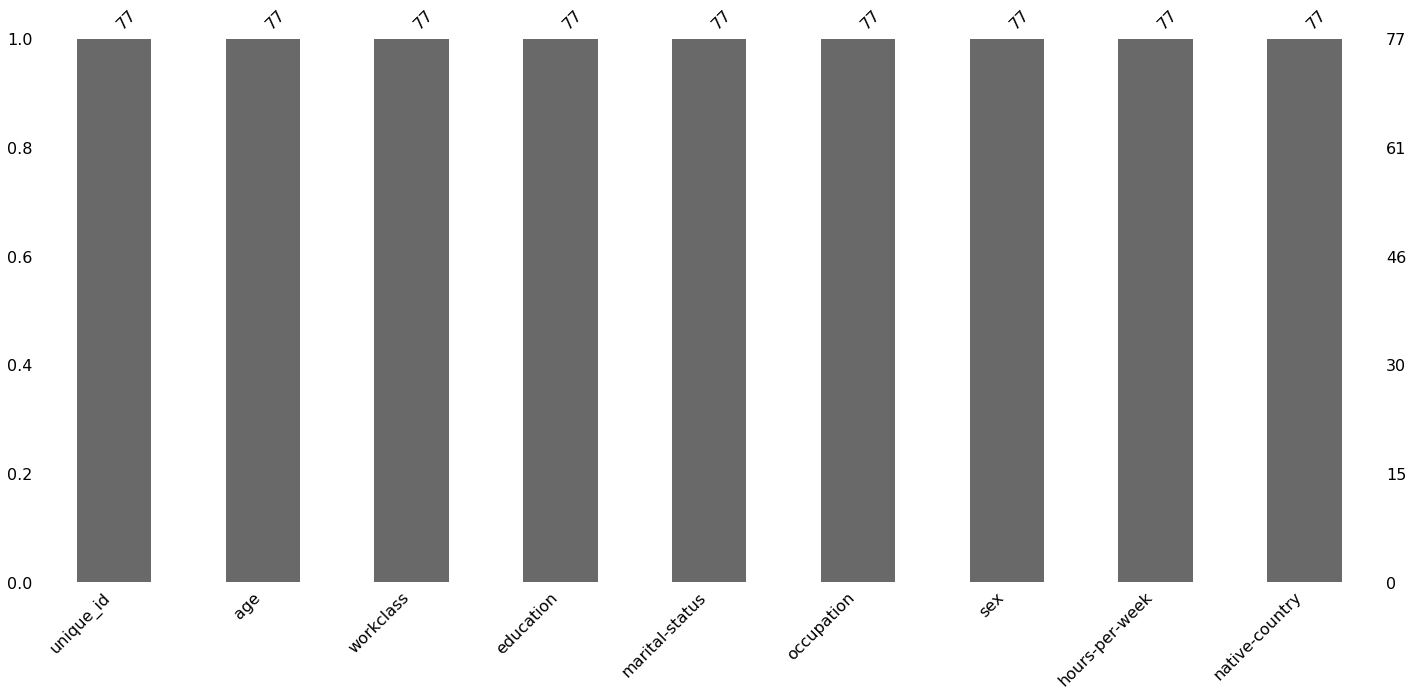

In [66]:
msno.bar(df)

And that's all! We don't have any missing value on our DataFrame.

Let's save our DataFrame without missing values, and move forward to the next lecture.

In [67]:
df.to_csv('data/adult-small-2.csv', index=False)

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)